# Import Library

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance
import numpy as np
import matplotlib
import os
import PIL
from skimage.util import random_noise
%matplotlib inline

# Import Gambar

In [2]:
#path
path="input"
images=os.listdir(path)

C:\Users\62877\AppData\Local\Temp\ipykernel_12584\1035268921.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


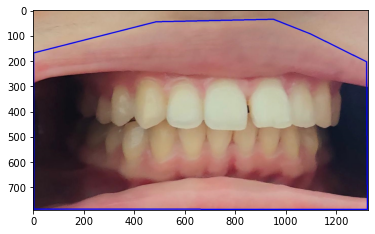

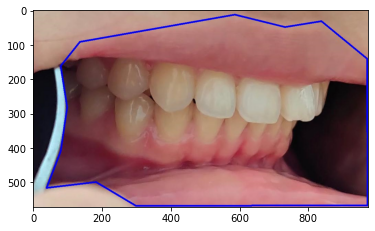

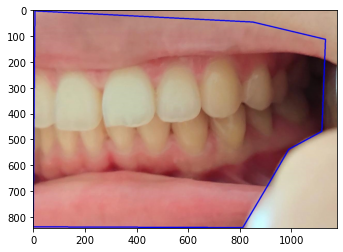

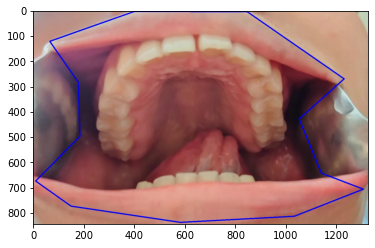

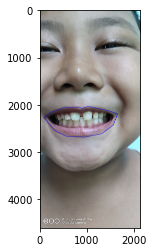

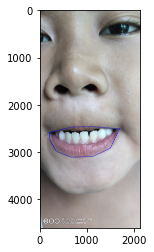

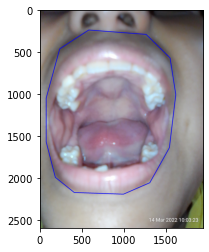

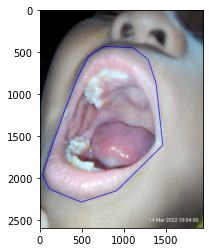

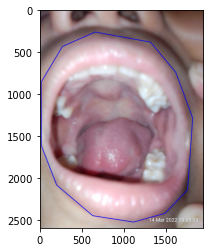

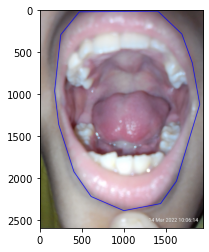

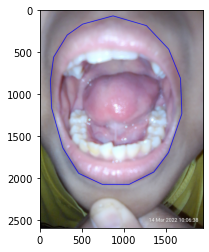

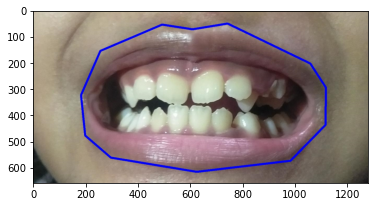

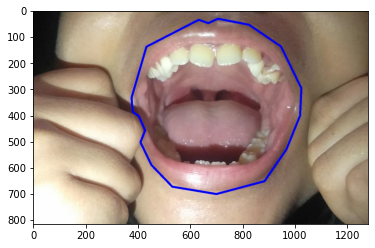

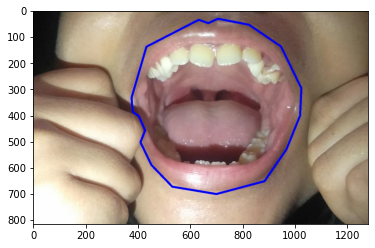

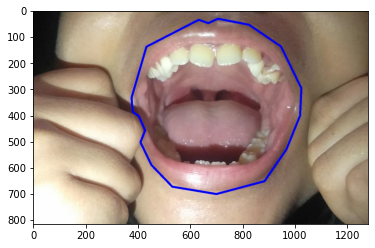

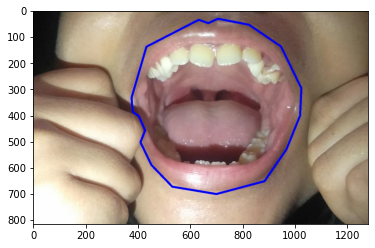

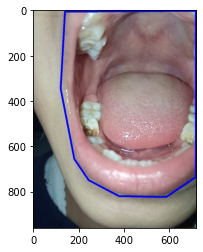

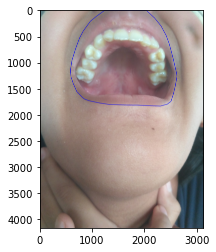

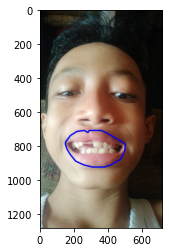

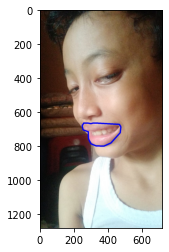

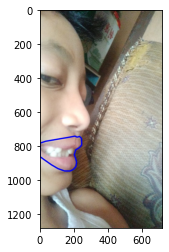

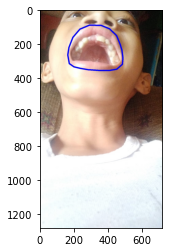

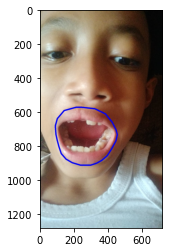

In [3]:
# gambar gigi semua
for img in images:
    img_arr=cv2.imread(os.path.join(path,img))
    img2 = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img2)

In [4]:
img_data=[]
for img in images:
    img_arr=cv2.imread(os.path.join(path,img))
    img2 = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    img_data.append(img2)

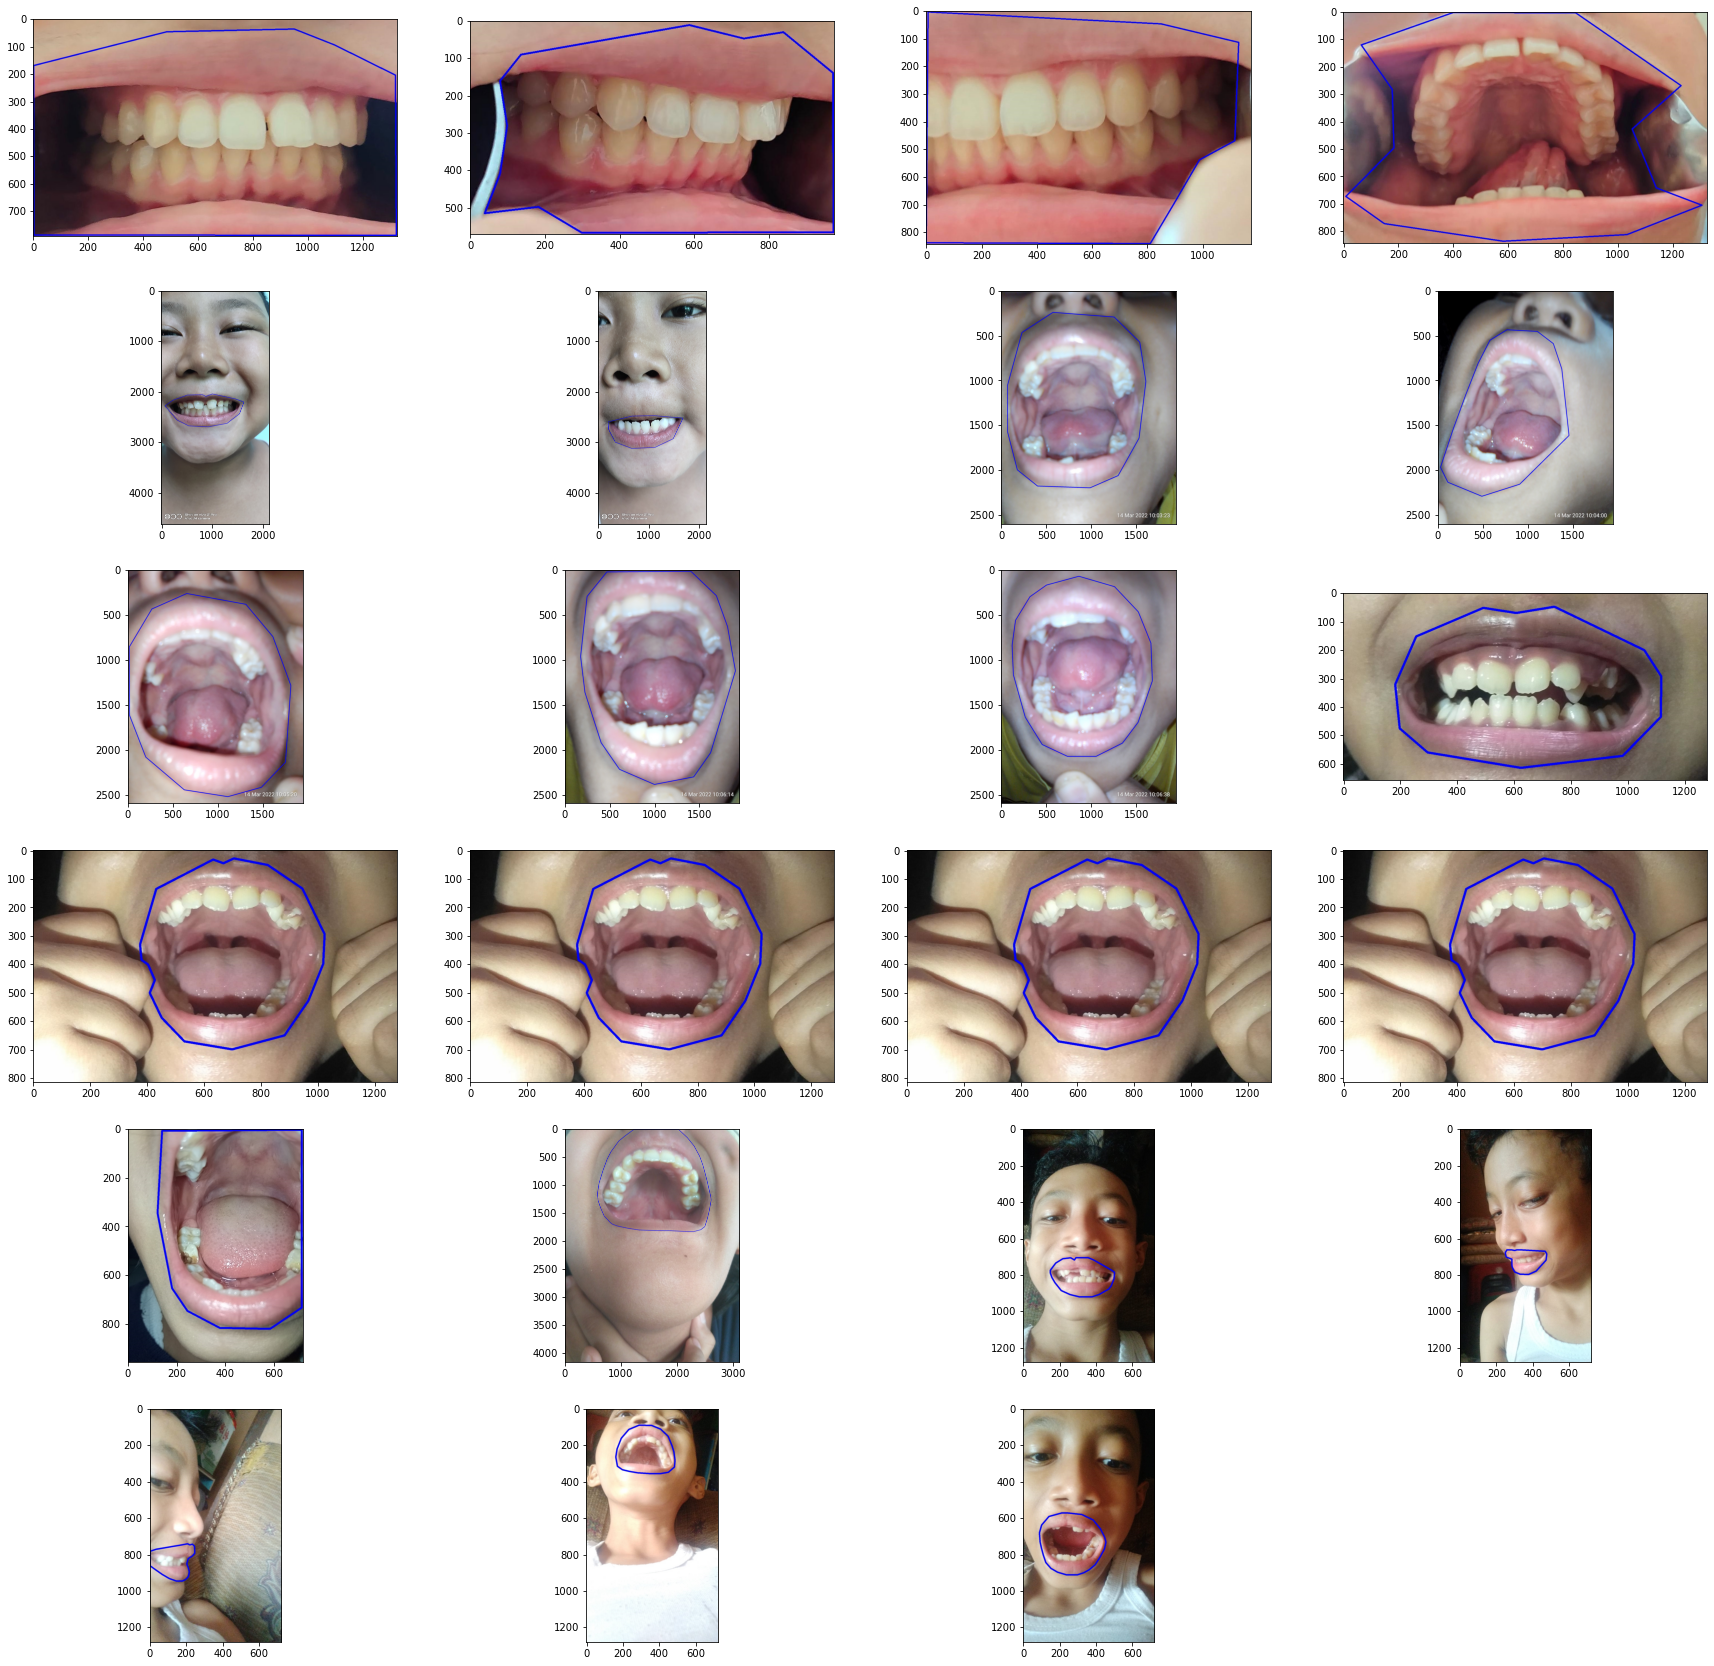

In [5]:
plt.figure(figsize=(30,30))
for i in range(len(img_data)):
    plt.subplot(6,4,i+1)
    plt.imshow(img_data[i])

# Rotate

TypeError: Image data of dtype object cannot be converted to float

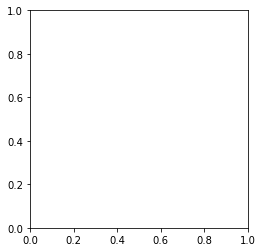

In [6]:
def rotate(img_data,rotate_img):
      h,w,c = img2.shape
      center = (h//2,w//2)
    
      if rotate_img in range (-359,360):
        if rotate_img == 0:
            imgr = cv2.rotate(img_data,rotateCode=0) #Memutar gambar 90 derajat ke kanan no skala
            return imgr
        elif rotate_img == 1:
            imgr = cv2.rotate(img_data,rotateCode=1) #Memutar gambar 180 derajat ke kanan no skala
            return imgr
        elif rotate_img == 2:
            imgr = cv2.rotate(img_data,rotateCode=2) #Memutar gambar 270 derajat ke kanan no skala
            return imgr
        elif rotate_img: # Many degree (-:memutar gambar ke kanan,kalau +:memutar gambar ke kiri) with skala
            rotation_matrix = cv2.getRotationMatrix2D(center,rotate_img,1.0)
            final_rotated = cv2.warpAffine(img_data,rotation_matrix,(w,h))
            return final_rotated
      else:
         print("Enter a rotate range of -359 or 359")    

for images in img_data:
    rotate(images,0)
    
plt.imshow(rotate)

# Flip

In [ ]:
def flip(img_data,flip_image):
    if flip_image == 0:
        flip = cv2.flip(img_data, 0) #0:flip image horizontal
        return flip
    elif flip_image == 1: #1:flip image vertikal
        flip = cv2.flip(img_data, 1) 
        return flip
    elif flip_image == -1:
        flip2 = cv2.flip(img_data, -1) #-1:flip image horizontal dan vertikal
        return flip2
    else:
        print("Enter a flip range of 0.1 or -1")

for images in img_data:
    flip(images,0)

plt.imshow(flip)

# Brightness

In [ ]:
def bright(img_data,ncrease_brightness):
    Bright = ImageEnhance.Brightness(img_data)
    if increase_brightness in np.arange(0.0, 255.1):
        img_bright = Bright.enhance(increase_brightness)
        return img_bright
    else:
        print("Please enter the brightness range from 0 to 255")        

for images in img_data:
    bright(images,2.0)
    
plt.imshow(bright)

# Noise

In [ ]:
def noisy(img_data,noise_typ):
    matplotlib.rc('figure', figsize=(8, 8))
    if noise_typ == "gauss":
      row = np.asarray(img_data).shape
      col = np.asarray(img_data).shape
      ch = np.asarray(img_data).shape
      combine = (row,col,ch)
    
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(combine))
      gauss = gauss.reshape(combine)
      noisy = img_data + gauss
      return noisy
      
    elif noise_typ == "s&p":
      row = np.asarray(img_data).shape
      col = np.asarray(img_data).shape
      ch = np.asarray(img_data).shape
      combine = (row,col,ch)
    
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(img_data)
      # Salt mode
      result = len(img_data)
      num_salt = np.ceil(amount * result * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in img2.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* result * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in np.asarray(img_data).shape]
      out[coords] = 0
      return out
    
    elif noise_typ == "poisson":
      vals = len(np.unique(img_data))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(img_data * vals) / float(vals)
      plt.imshow(noisy) 
    
    elif noise_typ =="speckle":
      row = np.asarray(img_data).shape
      col = np.asarray(img_data).shape
      ch = np.asarray(img_data).shape
      combine = (row,col,ch)
    
      gauss = np.random.randn(combine)
      gauss = gauss.reshape(combine)        
      noisy = img_data + img_data * gauss
      return noisy 
  
for images in img_data:
    noisy(images,"poisson")
    
plt.imshow(noisy)

# Contrast

In [ ]:
def contrast(img_data,increase_contrast):
    Contrast = ImageEnhance.Contrast(img_data)
    matplotlib.rc('figure', figsize=(8, 8))
    if increase_contrast in np.arange(0.0, 4.1):
        img_contrast = Contrast.enhance(increase_contrast)
        return img_contrast
    else:
        print("Please enter the contrast range from 0.0 to 4.0")
        
for images in img_data:
    contrast(img_data,2.0)
    
plt.imshow(img_contrast)